In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [269]:
data = pd.read_csv("Burt Data.csv")

In [270]:
data.head(20)

,BAY,BAM,BTM,Gender,Score,RAY,RAM,RTM,D,RLD
0,5,0,60,F,2,5,3,63,3,Good
1,5,0,60,F,3,5,3,63,3,Good
2,5,0,60,F,4,5,4,64,4,Good
3,5,0,60,F,5,5,5,65,5,Good
4,5,0,60,F,6,5,5,65,5,Good
5,5,0,60,F,7,5,6,66,6,Well
6,5,0,60,F,8,5,6,66,6,Well
7,5,0,60,F,9,5,7,67,7,Well
8,5,0,60,F,10,5,7,67,7,Well
9,5,0,60,F,11,5,8,68,8,Well


In [271]:
data.shape

(39676, 10)

In [272]:
data = data.fillna(data.mean())

In [273]:
data.cov()

,BAY,BAM,BTM,Score,RAY,RAM,RTM,D
BAY,1.625041e+01,-9.169449e-17,1.950049e+02,0.000000e+00,-7.020359e-17,2.999771e-17,-4.584724e-17,-195.004915
BAM,-9.169449e-17,1.144408e+01,1.144408e+01,3.094689e-16,-4.842615e-16,-2.124912e-16,1.192028e-15,-11.444075
BTM,1.950049e+02,1.144408e+01,2.351503e+03,-3.117613e-15,6.762468e-15,-9.312721e-17,-2.860868e-14,-2351.503055
Score,0.000000e+00,3.094689e-16,-3.117613e-15,9.900250e+02,8.537830e+01,-2.302810e+00,1.022237e+03,1022.236774
RAY,-7.020359e-17,-4.842615e-16,6.762468e-15,8.537830e+01,7.532384e+00,-1.140000e+00,8.924861e+01,89.248609
RAM,2.999771e-17,-2.124912e-16,-9.312721e-17,-2.302810e+00,-1.140000e+00,1.157087e+01,-2.109135e+00,-2.109135
RTM,-4.584724e-17,1.192028e-15,-2.860868e-14,1.022237e+03,8.924861e+01,-2.109135e+00,1.068874e+03,1068.874175
D,-1.950049e+02,-1.144408e+01,-2.351503e+03,1.022237e+03,8.924861e+01,-2.109135e+00,1.068874e+03,3420.377230


In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39676 entries, 0 to 39675
Data columns (total 10 columns):
BAY       39676 non-null int64
BAM       39676 non-null int64
BTM       39676 non-null int64
Gender    39676 non-null object
Score     39676 non-null int64
RAY       39676 non-null int64
RAM       39676 non-null int64
RTM       39676 non-null int64
D         39676 non-null int64
RLD       39676 non-null object
dtypes: int64(8), object(2)
memory usage: 3.0+ MB


In [275]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
CateList = data.select_dtypes(exclude="int64").columns
print(CateList)

Index(['Gender', 'RLD'], dtype='object')


In [276]:
for i in CateList:
    data[i] = LE.fit_transform(data[i])

In [277]:
print(LE.classes_)

['Good' 'Mild' 'Neutral' 'Severe' 'Well']


In [200]:
data.head(30)

,BAY,BAM,BTM,Gender,Score,RAY,RAM,RTM,D,RLD
0,5,0,60,0,2,5,3,63,3,0
1,5,0,60,0,3,5,3,63,3,0
2,5,0,60,0,4,5,4,64,4,0
3,5,0,60,0,5,5,5,65,5,0
4,5,0,60,0,6,5,5,65,5,0
5,5,0,60,0,7,5,6,66,6,4
6,5,0,60,0,8,5,6,66,6,4
7,5,0,60,0,9,5,7,67,7,4
8,5,0,60,0,10,5,7,67,7,4
9,5,0,60,0,11,5,8,68,8,4


In [201]:
data.describe()

,BAY,BAM,BTM,Gender,Score,RAY,RAM,RTM,D,RLD
count,39676.00000,39676.000000,39676.000000,39676.000000,39676.000000,39676.000000,39676.000000,39676.000000,39676.000000,39676.000000
mean,11.50000,5.307692,143.307692,0.500000,56.000000,8.697248,5.477064,109.844037,-33.463656,3.114679
std,4.03118,3.382909,48.492299,0.500006,31.464662,2.744519,3.401598,32.693641,58.483991,0.803148
min,5.00000,0.000000,60.000000,0.000000,2.000000,5.000000,0.000000,63.000000,-164.000000,0.000000
25%,8.00000,3.000000,101.000000,0.000000,29.000000,6.000000,3.000000,80.000000,-77.000000,3.000000
50%,11.50000,5.000000,143.500000,0.500000,56.000000,8.000000,6.000000,105.000000,-33.000000,3.000000
75%,15.00000,8.000000,185.000000,1.000000,83.000000,11.000000,9.000000,138.000000,9.000000,4.000000
max,18.00000,11.000000,227.000000,1.000000,110.000000,14.000000,11.000000,171.000000,111.000000,4.000000


In [202]:
data.cov()

,BAY,BAM,BTM,Gender,Score,RAY,RAM,RTM,D,RLD
BAY,1.625041e+01,-9.169449e-17,1.950049e+02,0.000000e+00,0.000000e+00,-7.020359e-17,2.999771e-17,-4.584724e-17,-1.950049e+02,-6.709263e-01
BAM,-9.169449e-17,1.144408e+01,1.144408e+01,4.298179e-18,3.094689e-16,-4.842615e-16,-2.124912e-16,1.192028e-15,-1.144408e+01,-6.149968e-02
BTM,1.950049e+02,1.144408e+01,2.351503e+03,-9.169449e-17,-3.117613e-15,6.762468e-15,-9.312721e-17,-2.860868e-14,-2.351503e+03,-8.112615e+00
Gender,0.000000e+00,4.298179e-18,-9.169449e-17,2.500063e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.398341e-15,-6.268178e-19
Score,0.000000e+00,3.094689e-16,-3.117613e-15,0.000000e+00,9.900250e+02,8.537830e+01,-2.302810e+00,1.022237e+03,1.022237e+03,6.046780e+00
RAY,-7.020359e-17,-4.842615e-16,6.762468e-15,0.000000e+00,8.537830e+01,7.532384e+00,-1.140000e+00,8.924861e+01,8.924861e+01,5.286836e-01
RAM,2.999771e-17,-2.124912e-16,-9.312721e-17,0.000000e+00,-2.302810e+00,-1.140000e+00,1.157087e+01,-2.109135e+00,-2.109135e+00,-1.231612e-02
RTM,-4.584724e-17,1.192028e-15,-2.860868e-14,0.000000e+00,1.022237e+03,8.924861e+01,-2.109135e+00,1.068874e+03,1.068874e+03,6.331887e+00
D,-1.950049e+02,-1.144408e+01,-2.351503e+03,1.398341e-15,1.022237e+03,8.924861e+01,-2.109135e+00,1.068874e+03,3.420377e+03,1.444450e+01
RLD,-6.709263e-01,-6.149968e-02,-8.112615e+00,-6.268178e-19,6.046780e+00,5.286836e-01,-1.231612e-02,6.331887e+00,1.444450e+01,6.450463e-01


In [203]:
corr = data.corr()

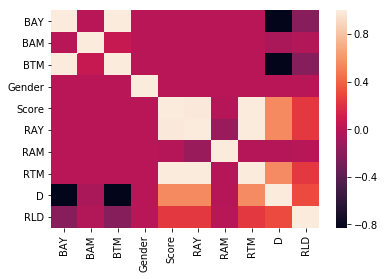

In [204]:
sns.heatmap(corr)

In [205]:
import sympy 

In [206]:
reduced_form, inds = sympy.Matrix(data.values).rref()
reduced_form

Matrix([
[1, 0, 12, 0, 0, 0, 0,  0, -12, 0],
[0, 1,  1, 0, 0, 0, 0,  0,  -1, 0],
[0, 0,  0, 1, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 1, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 1, 0, 12,  12, 0],
[0, 0,  0, 0, 0, 0, 1,  1,   1, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 1],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0,

In [207]:
inds

(0, 1, 3, 4, 5, 6, 9)

In [208]:
inds = list(inds)
inds

[0, 1, 3, 4, 5, 6, 9]

In [209]:
for i in range(10):
    if(i not in inds):
        print(data.columns[i])

BTM
RTM
D


In [210]:
data = data.drop(['BTM','RTM','D'], axis = 1) 

In [211]:
data.head(20)

,BAY,BAM,Gender,Score,RAY,RAM,RLD
0,5,0,0,2,5,3,0
1,5,0,0,3,5,3,0
2,5,0,0,4,5,4,0
3,5,0,0,5,5,5,0
4,5,0,0,6,5,5,0
5,5,0,0,7,5,6,4
6,5,0,0,8,5,6,4
7,5,0,0,9,5,7,4
8,5,0,0,10,5,7,4
9,5,0,0,11,5,8,4


In [212]:
data.cov()

,BAY,BAM,Gender,Score,RAY,RAM,RLD
BAY,1.625041e+01,-9.169449e-17,0.000000e+00,0.000000e+00,-7.020359e-17,2.999771e-17,-6.709263e-01
BAM,-9.169449e-17,1.144408e+01,4.298179e-18,3.094689e-16,-4.842615e-16,-2.124912e-16,-6.149968e-02
Gender,0.000000e+00,4.298179e-18,2.500063e-01,0.000000e+00,0.000000e+00,0.000000e+00,-6.268178e-19
Score,0.000000e+00,3.094689e-16,0.000000e+00,9.900250e+02,8.537830e+01,-2.302810e+00,6.046780e+00
RAY,-7.020359e-17,-4.842615e-16,0.000000e+00,8.537830e+01,7.532384e+00,-1.140000e+00,5.286836e-01
RAM,2.999771e-17,-2.124912e-16,0.000000e+00,-2.302810e+00,-1.140000e+00,1.157087e+01,-1.231612e-02
RLD,-6.709263e-01,-6.149968e-02,-6.268178e-19,6.046780e+00,5.286836e-01,-1.231612e-02,6.450463e-01


In [213]:
data.cov()

,BAY,BAM,Gender,Score,RAY,RAM,RLD
BAY,1.625041e+01,-9.169449e-17,0.000000e+00,0.000000e+00,-7.020359e-17,2.999771e-17,-6.709263e-01
BAM,-9.169449e-17,1.144408e+01,4.298179e-18,3.094689e-16,-4.842615e-16,-2.124912e-16,-6.149968e-02
Gender,0.000000e+00,4.298179e-18,2.500063e-01,0.000000e+00,0.000000e+00,0.000000e+00,-6.268178e-19
Score,0.000000e+00,3.094689e-16,0.000000e+00,9.900250e+02,8.537830e+01,-2.302810e+00,6.046780e+00
RAY,-7.020359e-17,-4.842615e-16,0.000000e+00,8.537830e+01,7.532384e+00,-1.140000e+00,5.286836e-01
RAM,2.999771e-17,-2.124912e-16,0.000000e+00,-2.302810e+00,-1.140000e+00,1.157087e+01,-1.231612e-02
RLD,-6.709263e-01,-6.149968e-02,-6.268178e-19,6.046780e+00,5.286836e-01,-1.231612e-02,6.450463e-01


In [214]:
data = data.drop(['Gender'], axis = 1) 

In [215]:
data.head(20)

,BAY,BAM,Score,RAY,RAM,RLD
0,5,0,2,5,3,0
1,5,0,3,5,3,0
2,5,0,4,5,4,0
3,5,0,5,5,5,0
4,5,0,6,5,5,0
5,5,0,7,5,6,4
6,5,0,8,5,6,4
7,5,0,9,5,7,4
8,5,0,10,5,7,4
9,5,0,11,5,8,4


In [216]:
corr = data.corr()

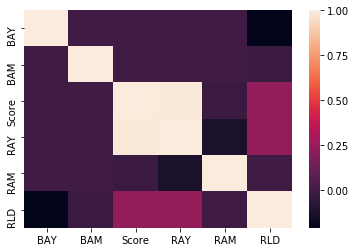

In [217]:
sns.heatmap(corr)

In [218]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [219]:
data.head()

,BAY,BAM,Score,RAM,RLD
0,5,0,2,3,0
1,5,0,3,3,0
2,5,0,4,4,0
3,5,0,5,5,0
4,5,0,6,5,0


In [220]:
data = data.drop(['RAM'], axis = 1) 

In [221]:
data.shape

(39676, 4)

In [222]:
data = data.drop_duplicates()

In [223]:
data.shape

(18312, 4)

In [224]:
data.head()

,BAY,BAM,Score,RLD
0,5,0,2,0
1,5,0,3,0
2,5,0,4,0
3,5,0,5,0
4,5,0,6,0


In [225]:
data=data.sample(frac=1).reset_index(drop=True)
data.head()

,BAY,BAM,Score,RLD
0,10,11,40,3
1,6,2,87,4
2,10,2,87,4
3,12,8,38,3
4,5,4,3,1


In [228]:
X=data.drop(['RLD'],axis=1).values
y=data['RLD'].values
print(X.shape, y.shape)

(18312, 3) (18312,)


In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [229]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(13734, 3) (13734,)
(4578, 3) (4578,)


In [230]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [284]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y = to_categorical(y)

In [285]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13734, 3) (13734, 5, 2)
(4578, 3) (4578, 5, 2)


In [286]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [287]:
input_dim = X.shape[1]
model = Sequential()
model.add(Dense(75, activation='relu', input_dim=input_dim))
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 75)                300       
_________________________________________________________________
dense_10 (Dense)             (None, 100)               7600      
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 505       
Total params: 8,405
Trainable params: 8,405
Non-trainable params: 0
_________________________________________________________________


In [291]:
history = model.fit(X, y,
                    epochs=100,
                    verbose=True,
                    batch_size = 128)

Epoch 1/100
144/144 [==============================] - 0s 1ms/step - loss: 0.0444 - accuracy: 0.9851
Epoch 2/100
144/144 [==============================] - 0s 1ms/step - loss: 0.0420 - accuracy: 0.9862: 0s - loss: 0.0410 - accuracy: 
Epoch 3/100
144/144 [==============================] - 0s 1ms/step - loss: 0.0856 - accuracy: 0.9702
Epoch 4/100
144/144 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.9853
Epoch 5/100
144/144 [==============================] - 0s 1ms/step - loss: 0.0462 - accuracy: 0.9827
Epoch 6/100
144/144 [==============================] - 0s 1ms/step - loss: 0.0422 - accuracy: 0.9853
Epoch 7/100
144/144 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9854
Epoch 8/100
144/144 [==============================] - 0s 1ms/step - loss: 0.0394 - accuracy: 0.9861
Epoch 9/100
144/144 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.9836
Epoch 10/100
144/144 [==============================] - 0s 

In [292]:
loss, accuracy = model.evaluate(X, y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9917


In [295]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    #val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    #val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Acc')
    #plt.plot(x, val_acc, 'r', label='Validation Acc')
    plt.title('Training Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training Loss')
    #plt.plot(x, val_loss, 'r', label='Validation Loss')
    plt.title('Training Loss')
    plt.legend()

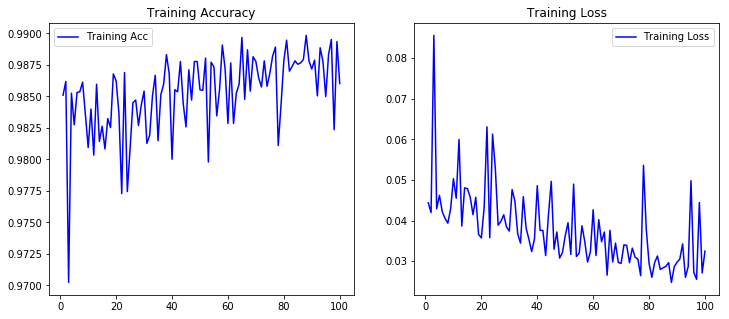

In [296]:
plot_history(history)

In [300]:
pred = model.predict([[10,3,31]])
classes = pred[0]
print(classes)
print(len(classes))
final=np.where(classes==max(classes))

[0.0000000e+00 6.4621804e-15 3.1779845e-28 1.0000000e+00 0.0000000e+00]
5


In [301]:
print(final)

(array([3], dtype=int64),)


In [302]:
if(final[0]==0):
    print("Good")
elif(final[0]==1):
    print("Mild")
elif(final[0]==2):
    print("Neutral")
elif(final[0]==3):
    print("Severe")
elif(final[0]==4):
    print("Well")    

Severe
